# Clustering
## Amazon Music Clustering Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import json

### 1. Load Processed Data

In [2]:
X_scaled_df = pd.read_csv('../data/processed/scaled_features.csv')
df = pd.read_csv('../data/processed/original_with_features.csv')

### 2. Determine Optimal K (Elbow Method)

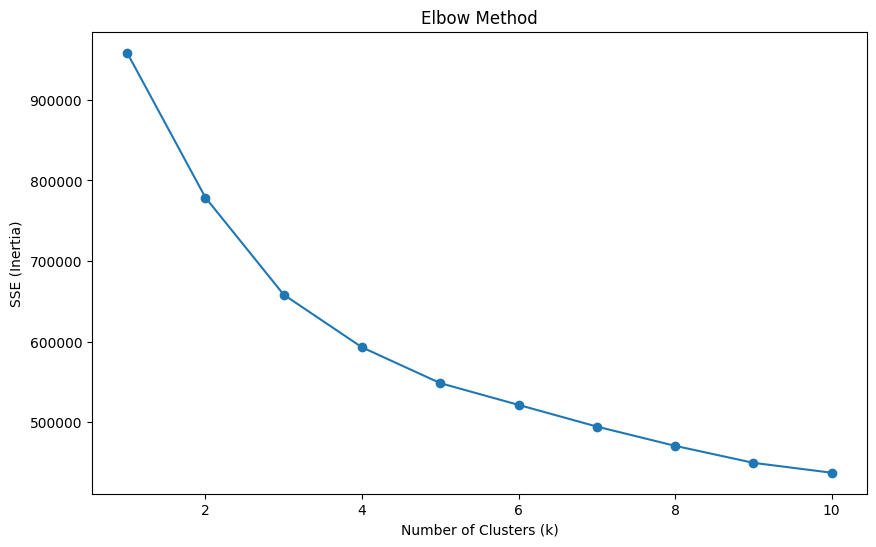

In [3]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()

### 3. Determine Optimal K (Silhouette Score)

In [ ]:
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_df)
    score = silhouette_score(X_scaled_df, labels)
    sil_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

### 4. Train K-Means Model

In [ ]:
# Assuming k=4 based on typical music data analysis, but user can adjust
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df)

df['cluster'] = clusters
X_scaled_df['cluster'] = clusters

### 5. Save Model and Results

In [ ]:
# Save Model
with open('../models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Save Clustered Data
df.to_csv('../data/processed/clustered_data.csv', index=False)

# Save Cluster Profiles
cluster_profiles = df.groupby('cluster')[X_scaled_df.columns[:-1]].mean().to_dict()
with open('../models/cluster_profiles.json', 'w') as f:
    json.dump(cluster_profiles, f)